In [1]:
"""
Linear Regression
Supervised Learning 을 통한 예측
1차원 그래프

그래프상에서 실제 데이터들을 점들로 표현했을 때 
가설로 세운 1차 그래프에서 가까울 수록 가설이 좋음.

Cost(Loss) function
실제 데이터와 세운 가설이 얼마나 다른지 나타내는 그래프
H(x) - y -> 차이가 음수가 되거나 양수가 될 수 있기 때문에 좋지 않음
(H(x) -y)제곱이 좋음. 항상 양수로 표현되며, 값이 커질 수록(예측이 빗나간 정도가 클 수록) 더 강조 되기 때문

H(x) = Wx + b일 때
cost(W,b) = 1/m * 시그마(i=1 ~ m까지) (H(x(i)) - y(i))제곱

cost가 가장 작아지는 W,b값을 구하는 것이 Linear Regression의 목적

원리
2차함수는 특정 값을 향해 수렴할 수 있음 현재 점에서 기울기를 통해 기울기가 작아지는 방향으로 나아가다 보면
결국 기울기가 0인 지점에 도달하게 된다. 

3차원에서 어느 점에서 시작하든 답을 향해 나아갈 수 있도록 cost함수를 설계해야 한다. 
"""

'\nLinear Regression\nSupervised Learning 을 통한 예측\n1차원 그래프\n\n그래프상에서 실제 데이터들을 점들로 표현했을 때 \n가설로 세운 1차 그래프에서 가까울 수록 가설이 좋음.\n\nCost(Loss) function\n실제 데이터와 세운 가설이 얼마나 다른지 나타내는 그래프\nH(x) - y -> 차이가 음수가 되거나 양수가 될 수 있기 때문에 좋지 않음\n(H(x) -y)제곱이 좋음. 항상 양수로 표현되며, 값이 커질 수록(예측이 빗나간 정도가 클 수록) 더 강조 되기 때문\n\nH(x) = Wx + b일 때\ncost(W,b) = 1/m * 시그마(i=1 ~ m까지) (H(x(i)) - y(i))제곱\n\ncost가 가장 작아지는 W,b값을 구하는 것이 Linear Regression의 목적\n\n원리\n2차함수는 특정 값을 향해 수렴할 수 있음 현재 점에서 기울기를 통해 기울기가 작아지는 방향으로 나아가다 보면\n결국 기울기가 0인 지점에 도달하게 된다. \n\n3차원에서 어느 점에서 시작하든 답을 향해 나아갈 수 있도록 cost함수를 설계해야 한다. \n'

In [3]:
import tensorflow as tf

#X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

#[1] 은 [](Rank 1) 요소 1개(shape 1), rando_normal은 랜덤 메서드, reduce_mean 메서드는 평균 내주는 함수. 1/m 시그마 (i=1~m) 까지 의미
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = W * x_train + b

cost = tf.reduce_mean(tf.square(hypothesis - y_train))

#minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

#launch the graph in session
sess = tf.Session()
#Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

#fit the line
for step in range(2001):
    sess.run(train)
    if step%20 == 0 :
        print(step, sess.run(cost), sess.run(W), sess.run(b))

Instructions for updating:
Colocations handled automatically by placer.
0 6.902448 [-0.33296877] [0.27472213]
20 0.12972552 [0.60083145] [0.64503396]
40 0.06215657 [0.70254177] [0.65120983]
60 0.055946887 [0.7244197] [0.6240798]
80 0.050807282 [0.7381231] [0.59508115]
100 0.046143923 [0.75050193] [0.56714606]
120 0.041908655 [0.7622343] [0.5404952]
140 0.038062103 [0.77340907] [0.5150942]
160 0.034568653 [0.784058] [0.49088678]
180 0.031395804 [0.7942065] [0.46781692]
200 0.028514156 [0.80387807] [0.44583124]
220 0.025897032 [0.81309503] [0.4248789]
240 0.023520092 [0.82187885] [0.4049112]
260 0.021361316 [0.8302499] [0.3858819]
280 0.019400714 [0.8382275] [0.36774692]
300 0.017620025 [0.8458302] [0.35046414]
320 0.016002787 [0.8530756] [0.33399367]
340 0.014533992 [0.8599806] [0.3182971]
360 0.013199974 [0.86656106] [0.30333823]
380 0.011988443 [0.8728322] [0.28908244]
400 0.010888091 [0.87880856] [0.27549666]
420 0.00988874 [0.8845041] [0.2625493]
440 0.00898111 [0.889932] [0.2502105

In [4]:
import tensorflow as tf
#같은 결과
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

for step in range(2001):
    cost_val, W_val, b_val, _ = \
    sess.run([cost, W, b, train], feed_dict = {X:[1, 2, 3, 4, 5], Y:[2.1, 3.1, 4.1, 5.1, 6.1]})
    if step%20 == 0: 
        print(step, cost_val, W_val, b_val)

0 4.9214873e-06 [0.9974296] [0.00584302]
20 4.469685e-06 [0.9975504] [0.00556842]
40 4.0592895e-06 [0.9976655] [0.00530675]
60 3.6870654e-06 [0.9977752] [0.00505738]
80 3.3487222e-06 [0.9978798] [0.00481972]
100 3.0411604e-06 [0.9979794] [0.00459321]
120 2.7622307e-06 [0.99807435] [0.00437737]
140 2.5085585e-06 [0.9981649] [0.00417165]
160 2.2783117e-06 [0.99825114] [0.0039756]
180 2.0692273e-06 [0.99833333] [0.00378876]
200 1.8792585e-06 [0.9984116] [0.00361073]
220 1.706846e-06 [0.9984863] [0.00344106]
240 1.5501791e-06 [0.9985574] [0.00327933]
260 1.4078955e-06 [0.9986252] [0.00312524]
280 1.2787159e-06 [0.9986898] [0.00297838]
300 1.1612435e-06 [0.99875134] [0.00283843]
320 1.054888e-06 [0.99881] [0.00270505]
340 9.579064e-07 [0.99886596] [0.00257794]
360 8.7011927e-07 [0.99891925] [0.0024568]
380 7.9015723e-07 [0.9989701] [0.00234134]
400 7.17741e-07 [0.99901843] [0.00223132]
420 6.5185026e-07 [0.99906456] [0.00212646]
440 5.9204666e-07 [0.9991085] [0.00202652]
460 5.376648e-07 [0

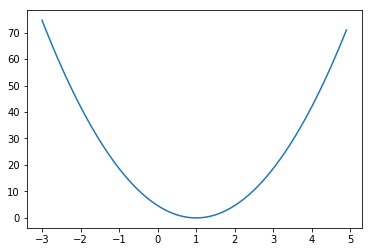

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1,2,3]
Y = [1,2,3]

W = tf.placeholder(tf.float32)

hypothesis = W * X

cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess = tf.Session()

sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []

for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
plt.plot(W_val, cost_val)
plt.show()

In [71]:
import tensorflow as tf

#데이터 X일 때 Y의 결과가 나온다고 할 때 (=트레이닝 데이터가 주어질 때)
X_data = [1, 2, 3]
Y_data = [1, 2, 3]

#계수 W는 현재 알 수 없는 값
W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

#가설 함수 hypothesis
hypothesis = W * X_data

#목적 함수 cost cost(W) = 실제 데이터 들이 가설함수와 떨어진 거리의 제곱값 들의 평균치
#cost(W)가 작다는 것은 평균적으로 실제 데이터들이 가설함수에 근접했다는 의미가 된다. 즉 평균치의 최솟값을 구하는 것이 목적
#cost = 1/m 시그마(i=1~m) ( H(i번째 x) - (i번째 y) )제곱
#tf.reduce_mean(수식) 메서드 = 1/m 시그마(i=1~m) = 시그마 합의 평균을 반환하는 메서드

cost = tf.reduce_mean(tf.square(hypothesis - Y))
'''
gradient descent 라는 것은

어떤 한점에서 기울기를 구했을 때 기울기가 작아지는 방향으로 나아가겠다는 의미이다. 따라서 W 현재값에 미분한 식(기울기)를 뺀다. 

식으로 표현하면

    W := W - (알파)* 1/m 시그마(i=1~m) { (W * x(i) - y(i))* x(i) }(=미분한 식)
    
만약 기울기를 더한다면 커지는 방향으로 나아가겠다는 의미
알파 = Learning rate
'''

#minimize : gradient descent using derivative : W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W*X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent) 

'''
#minimize : gradient descent magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)
#세션 준비
sess = tf.Session()
#세션 변수 초기화
sess.run(tf.global_variables_initializer())
#launch
for step in range(100):
    print(step, sess.run(W))
    sess.run(train)

'''
#실행

#세션 준비
sess = tf.Session()
#세션 변수 초기화
sess.run(tf.global_variables_initializer())

for step in range(21) :
    sess.run(update, feed_dict={X: X_data, Y: Y_data})
    print('step: {0}, cost: {1}, W: {2}'.format(step, sess.run(cost, feed_dict={X: X_data, Y: Y_data}), sess.run(W)) )
    



step: 0, cost: 13.742805480957031, W: [-0.7160673]
step: 1, cost: 3.909064531326294, W: [0.08476412]
step: 2, cost: 1.111911654472351, W: [0.5118742]
step: 3, cost: 0.3162771463394165, W: [0.7396662]
step: 4, cost: 0.08996324986219406, W: [0.86115533]
step: 5, cost: 0.025589555501937866, W: [0.9259495]
step: 6, cost: 0.007278793025761843, W: [0.96050644]
step: 7, cost: 0.002070402493700385, W: [0.9789368]
step: 8, cost: 0.000588918337598443, W: [0.98876625]
step: 9, cost: 0.0001675139501458034, W: [0.99400866]
step: 10, cost: 4.765029007103294e-05, W: [0.9968046]
step: 11, cost: 1.3553642929764464e-05, W: [0.9982958]
step: 12, cost: 3.8553330341528635e-06, W: [0.9990911]
step: 13, cost: 1.096709070225188e-06, W: [0.99951524]
step: 14, cost: 3.1205553341351333e-07, W: [0.99974144]
step: 15, cost: 8.871533196952441e-08, W: [0.99986213]
step: 16, cost: 2.5263815928155964e-08, W: [0.99992645]
step: 17, cost: 7.187608730419015e-09, W: [0.9999608]
step: 18, cost: 2.040097202282709e-09, W: [0

In [76]:
import tensorflow as tf

X = [1, 2, 3]
Y = [1, 2, 3]

#tf.Variable(tf.random_normal([1]), name='weight')
W = tf.Variable(5.)

hypothesis = W * X
#직접 계산한 기울기 값
gradient = tf.reduce_mean((W * X - Y) * X) * 2

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

'''
#optimizer.minimize(cost)는 가능하지만 compute_gradients는 함수와 변수 둘 다 넣어줘야함

# Create an optimizer.
opt = GradientDescentOptimizer(learning_rate=0.1)

# Compute the gradients for a list of variables.
grads_and_vars = opt.compute_gradients(loss, <list of variables>)

# grads_and_vars is a list of tuples (gradient, variable).  Do whatever you
# need to the 'gradient' part, for example cap them, etc.
capped_grads_and_vars = [(MyCapper(gv[0]), gv[1]) for gv in grads_and_vars]

# Ask the optimizer to apply the capped gradients.
opt.apply_gradients(capped_grads_and_vars)
'''
#get gradient 기울기 추출 = tensorflow가 계산한 기울기 값
gvs = optimizer.compute_gradients(cost, W)
#apply gradients 기울기 적용
apply_gradients = optimizer.apply_gradients(gvs)

#최솟값
#train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100) :
    print(step, sess.run([gradient, W, gvs]) )
    sess.run(apply_gradients)
#직접계산한 gradient 값과 tensorflow가 계산한 gradient 값이 동일함.

0 [37.333332, 5.0, [(37.333336, 5.0)]]
1 [33.84889, 4.6266665, [(33.84889, 4.6266665)]]
2 [30.689657, 4.2881775, [(30.689657, 4.2881775)]]
3 [27.825287, 3.9812808, [(27.825287, 3.9812808)]]
4 [25.228262, 3.703028, [(25.228262, 3.703028)]]
5 [22.873621, 3.4507453, [(22.873623, 3.4507453)]]
6 [20.738752, 3.2220092, [(20.73875, 3.2220092)]]
7 [18.803137, 3.0146217, [(18.803137, 3.0146217)]]
8 [17.048176, 2.8265903, [(17.048176, 2.8265903)]]
9 [15.457013, 2.6561086, [(15.457014, 2.6561086)]]
10 [14.014359, 2.5015385, [(14.01436, 2.5015385)]]
11 [12.706352, 2.361395, [(12.706352, 2.361395)]]
12 [11.520427, 2.2343314, [(11.520427, 2.2343314)]]
13 [10.445186, 2.119127, [(10.445185, 2.119127)]]
14 [9.470302, 2.0146751, [(9.470302, 2.0146751)]]
15 [8.586407, 1.9199722, [(8.586407, 1.9199722)]]
16 [7.785009, 1.8341081, [(7.785009, 1.8341081)]]
17 [7.0584083, 1.756258, [(7.0584083, 1.756258)]]
18 [6.399624, 1.685674, [(6.399624, 1.685674)]]
19 [5.8023257, 1.6216778, [(5.8023252, 1.6216778)]]
20 [